In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breastcancer/wdbc.names
/kaggle/input/breastcancer/wdbc.data


In [40]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler



# Φόρτωση των δεδομένων
df = pd.read_csv("/kaggle/input/breastcancer/wdbc.data", header=None, names=columns)

# Αφαίρεση στήλης ID
df.drop(columns=["id"], inplace=True)

# Label Encoding: M -> 1, B -> 0
df["diagnosis"] = LabelEncoder().fit_transform(df["diagnosis"])

# Κανονικοποίηση των χαρακτηριστικών
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop("diagnosis", axis=1))

# Διαχωρισμός σε X και y
X = pd.DataFrame(X_scaled, columns=df.columns[1:])
y = df["diagnosis"]


✅ Πλάνο Οργάνωσης Κώδικα
1. Ανάλυση Προβλήματος
Φύση δεδομένων, στόχος → classification

Ισορροπία κατηγοριών

2. Προεπεξεργασία
Καθαρισμός, έλεγχος nulls

Label Encoding

Αφαίρεση ID

Κανονικοποίηση (StandardScaler)

3. Οπτικοποίηση
Countplots, histograms

Heatmaps

Boxplots

PCA/TSNE (προαιρετικό)

4. Καθαρισμός
Outlier detection

Drop duplicates

Re-scaling (επαναβεβαίωση)

5. Διαχωρισμός Συνόλων
train_test_split (stratified)

6. Εκπαίδευση Μοντέλων
Logistic Regression

Random Forest

XGBoost

SVM

Αξιολόγηση: Accuracy, Precision, Recall, F1, ROC-AUC

7. Επεξήγηση Αποτελεσμάτων
Feature importance

SHAP ή LIME analysis

8. Ενεργειακή Κατανάλωση
CodeCarbon + CarbonTracker (αν υποστηρίζεται στο περιβάλλον)

9. Βελτιστοποίηση Ενεργειακής Αποδοτικότητας
Quantization/pruning αναφορά

10. Ηθικά Ζητήματα
Ιδιωτικότητα, συνέπειες σφαλμάτων, υπευθυνότητα

11. Federated Learning (προαιρετική επέκταση)
Θεωρητική βάση & αρχική υλοποίηση με Flower ή PySyft

In [18]:
 display(df.head())

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
print(df.columns)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [20]:
df.drop(['diagnosis'], axis=1, inplace=True)


In [21]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
df.columns = df.columns.str.strip()


In [24]:
print(df.columns)


Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [26]:
for col in df.columns:
    print(f"'{col}'")


'radius_mean'
'texture_mean'
'perimeter_mean'
'area_mean'
'smoothness_mean'
'compactness_mean'
'concavity_mean'
'concave_points_mean'
'symmetry_mean'
'fractal_dimension_mean'
'radius_se'
'texture_se'
'perimeter_se'
'area_se'
'smoothness_se'
'compactness_se'
'concavity_se'
'concave_points_se'
'symmetry_se'
'fractal_dimension_se'
'radius_worst'
'texture_worst'
'perimeter_worst'
'area_worst'
'smoothness_worst'
'compactness_worst'
'concavity_worst'
'concave_points_worst'
'symmetry_worst'
'fractal_dimension_worst'


In [27]:
print(df.iloc[:, 0].head())  # Access the first column to verify if 'diagnosis' is there


0    17.99
1    20.57
2    19.69
3    11.42
4    20.29
Name: radius_mean, dtype: float64


In [28]:
print(df.columns[df.columns.duplicated()])


Index([], dtype='object')


In [29]:
print(df.head())  # To visually inspect the first few rows and confirm 'diagnosis' exists


   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave_points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           

In [31]:
X = df.drop('radius_mean', axis=1)
y = df['radius_mean']

df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

df.head(10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [35]:
print(X_scaled.shape)


(569, 29)


In [41]:
# Encode the 'diagnosis' column: M → 1 (malignant), B → 0 (benign)
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

df.head()
df.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [42]:
# Separate features and labels
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [43]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

df.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [44]:
from sklearn.model_selection import train_test_split

# Split into train (70%) and temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Split temp into val (15%) and test (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Print shapes
print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)

Train shape: (398, 30)
Validation shape: (85, 30)
Test shape: (86, 30)


In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

# Function to build a 2-hidden-layer MLP model
def build_mlp_model(input_dim, l2_lambda=0.001, dropout_rate=0.3, use_batchnorm=False):
    model = Sequential()

    # First Hidden Layer
    model.add(Dense(128, activation='relu', input_shape=(input_dim,), kernel_regularizer=l2(l2_lambda)))
    if use_batchnorm:
        model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

    # Second Hidden Layer
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(l2_lambda)))
    if use_batchnorm:
        model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

    # Output Layer for binary classification
    model.add(Dense(1, activation='sigmoid'))

    return model

# ✅ Create the model
model = build_mlp_model(input_dim=30, l2_lambda=0.001, dropout_rate=0.3, use_batchnorm=True)

# ✅ Show model summary
model.summary()

2025-04-25 19:35:15.400007: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745609715.612999      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745609715.677223      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-25 19:35:29.053467: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           3,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,057 (51.00 KB)

 Trainable params: 12,673 (49.50 KB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
# ✅ Regularization Experiments

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# Common model builder function with flexible regularization options
def build_model(input_dim, l2_lambda=0.001, dropout_rate=0.3, use_batchnorm=False, use_dropout=True):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(input_dim,), kernel_regularizer=l2(l2_lambda)))
    if use_batchnorm:
        model.add(BatchNormalization())
    if use_dropout:
        model.add(Dropout(dropout_rate))

    model.add(Dense(64, activation='relu', kernel_regularizer=l2(l2_lambda)))
    if use_batchnorm:
        model.add(BatchNormalization())
    if use_dropout:
        model.add(Dropout(dropout_rate))

    model.add(Dense(1, activation='sigmoid'))
    return model

# Function to compile, train and evaluate the model
def train_evaluate_model(model, X_train, y_train, X_val, y_val, epochs=50, batch_size=32):
    model.compile(optimizer=Adam(),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(X_train, y_train, 
                        epochs=epochs, 
                        batch_size=batch_size, 
                        validation_data=(X_val, y_val), 
                        verbose=0)
    return history

# Configurations to test
configs = {
    "No Regularization": {"l2_lambda": 0.0, "dropout_rate": 0.0, "use_batchnorm": False, "use_dropout": False},
    "L2 Regularization Only": {"l2_lambda": 0.01, "dropout_rate": 0.0, "use_batchnorm": False, "use_dropout": False},
    "Dropout Only": {"l2_lambda": 0.0, "dropout_rate": 0.3, "use_batchnorm": False, "use_dropout": True},
    "BatchNorm Only": {"l2_lambda": 0.0, "dropout_rate": 0.0, "use_batchnorm": True, "use_dropout": False},
    "L2 + Dropout": {"l2_lambda": 0.01, "dropout_rate": 0.3, "use_batchnorm": False, "use_dropout": True},
    "L2 + Dropout + BatchNorm": {"l2_lambda": 0.01, "dropout_rate": 0.3, "use_batchnorm": True, "use_dropout": True},
}

# Dictionary to store histories
regularization_histories = {}

# Train all configs
for name, config in configs.items():
    print(f"Training with {name}...")
    model = build_model(input_dim=X_train.shape[1],
                        l2_lambda=config["l2_lambda"],
                        dropout_rate=config["dropout_rate"],
                        use_batchnorm=config["use_batchnorm"],
                        use_dropout=config["use_dropout"])
    history = train_evaluate_model(model, X_train, y_train, X_val, y_val)
    regularization_histories[name] = history
    print(f"{name} done.")

# Plotting the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for name, history in regularization_histories.items():
    plt.plot(history.history['val_accuracy'], label=f'{name}')

plt.title('Validation Accuracy - Regularization Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Training with No Regularization...
No Regularization done.
Training with L2 Regularization Only...
L2 Regularization Only done.
Training with Dropout Only...
Dropout Only done.
Training with BatchNorm Only...
BatchNorm Only done.
Training with L2 + Dropout...
L2 + Dropout done.
Training with L2 + Dropout + BatchNorm...
L2 + Dropout + BatchNorm done.


In [47]:
from sklearn.preprocessing import StandardScaler

# Δημιουργία του αντικειμένου StandardScaler
scaler = StandardScaler()

# Στάνταρδοποιούμε τα δεδομένα εκπαίδευσης και τα δεδομένα ελέγχου
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Μοντέλο 1: Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

# Μοντέλο 2: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)  # Δεν απαιτείται στάνταρδοποίηση για το Random Forest

# Μοντέλο 3: XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)  # Δεν απαιτείται στάνταρδοποίηση για το XGBoost


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Συνάρτηση αξιολόγησης
def evaluate(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred), 
        'Precision': precision_score(y_true, y_pred), 
        'Recall': recall_score(y_true, y_pred),
        'F1-score': f1_score(y_true, y_pred)
    }

# Προβλέψεις για τα μοντέλα
y_pred_log = log_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

# Αξιολόγηση των αποτελεσμάτων
print("Logistic Regression:", evaluate(y_test, y_pred_log))
print("Random Forest:", evaluate(y_test, y_pred_rf))
print("XGBoost:", evaluate(y_test, y_pred_xgb))


Logistic Regression: {'Accuracy': 0.9767441860465116, 'Precision': 0.96875, 'Recall': 0.96875, 'F1-score': 0.96875}
Random Forest: {'Accuracy': 0.9651162790697675, 'Precision': 1.0, 'Recall': 0.90625, 'F1-score': 0.9508196721311475}
XGBoost: {'Accuracy': 0.9651162790697675, 'Precision': 1.0, 'Recall': 0.90625, 'F1-score': 0.9508196721311475}


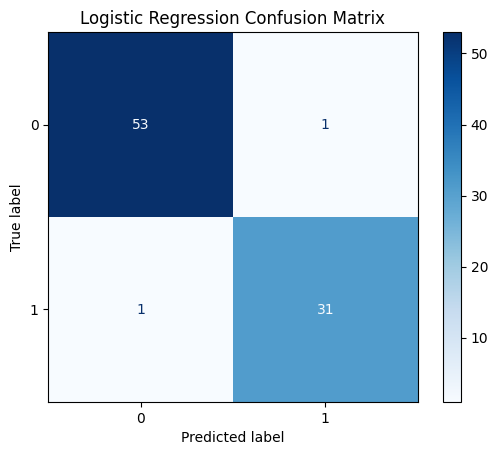

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Απεικόνιση του confusion matrix για το Logistic Regression
ConfusionMatrixDisplay.from_estimator(log_model, X_test_scaled, y_test, cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()


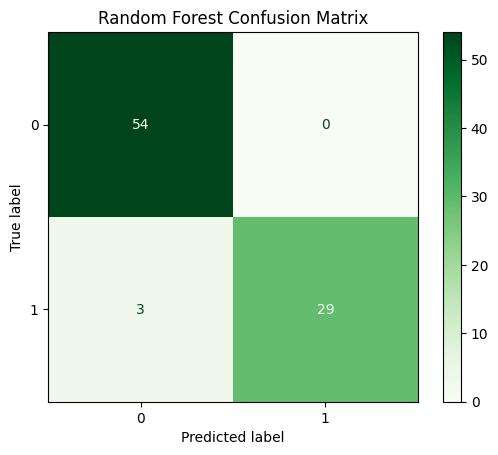

In [51]:
# Απεικόνιση του confusion matrix για το Random Forest
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap='Greens', values_format='d')
plt.title("Random Forest Confusion Matrix")
plt.show()


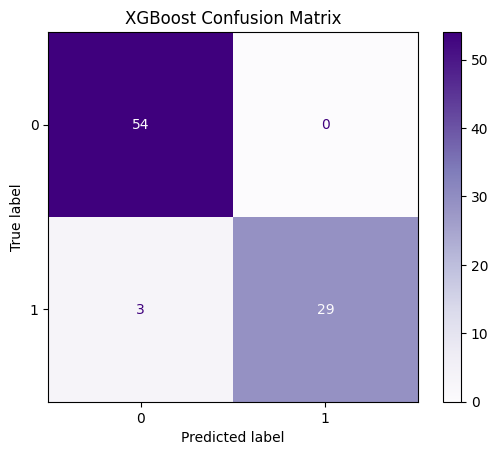

In [52]:
# Απεικόνιση του confusion matrix για το XGBoost
ConfusionMatrixDisplay.from_estimator(xgb_model, X_test, y_test, cmap='Purples', values_format='d')
plt.title("XGBoost Confusion Matrix")
plt.show()


In [53]:
from sklearn.model_selection import cross_val_score

# Διασταυρούμενη αξιολόγηση για Logistic Regression
cv_scores = cross_val_score(log_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores for Logistic Regression: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean()}")


Cross-validation scores for Logistic Regression: [0.9625     1.         0.9875     0.97468354 0.93670886]
Mean accuracy: 0.9722784810126581


In [54]:
from sklearn.model_selection import GridSearchCV

# Εξ ορισμού παραμέτρων για το Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f"Best parameters for Random Forest: {grid_search.best_params_}")


Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}


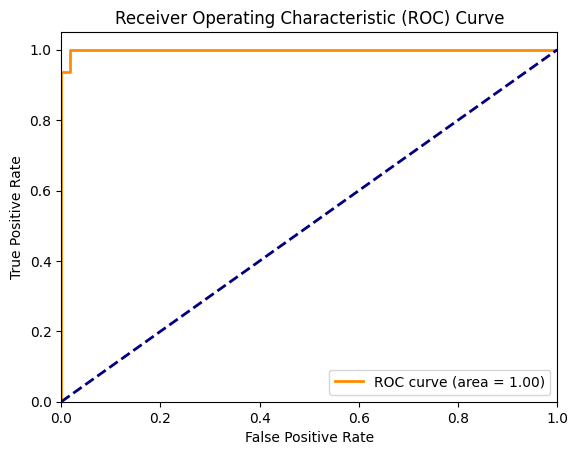

In [55]:
from sklearn.metrics import roc_curve, auc

# Υπολογισμός ROC και AUC για Logistic Regression
fpr, tpr, thresholds = roc_curve(y_test, log_model.predict_proba(X_test_scaled)[:,1])
roc_auc = auc(fpr, tpr)

# Εμφάνιση της καμπύλης ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Precision-Recall AUC: 0.9980764678030303


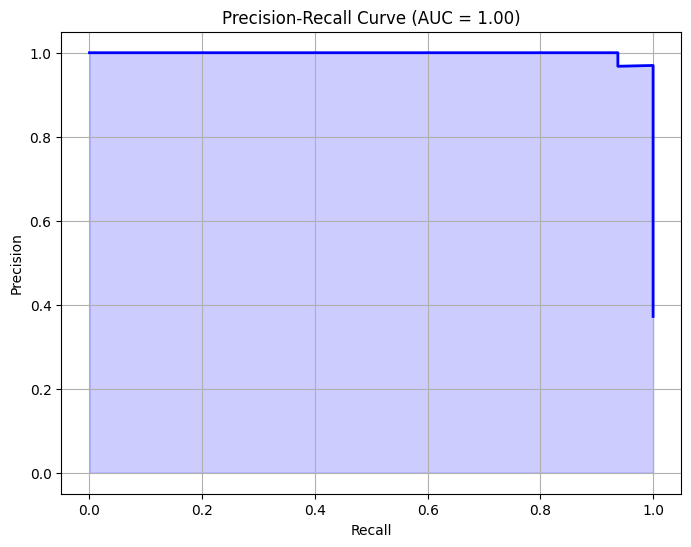

In [59]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# Υπολογισμός Precision και Recall για Logistic Regression
y_prob = log_model.predict_proba(X_test_scaled)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Υπολογισμός AUC για την καμπύλη Precision-Recall
auc_pr = average_precision_score(y_test, y_prob)
print(f"Precision-Recall AUC: {auc_pr}")

# Δημιουργία της καμπύλης Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.fill_between(recall, precision, color='blue', alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (AUC = {auc_pr:.2f})')
plt.grid(True)
plt.show()


In [57]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)
print("SVM Model:", evaluate(y_test, y_pred_svm))


SVM Model: {'Accuracy': 0.9651162790697675, 'Precision': 1.0, 'Recall': 0.90625, 'F1-score': 0.9508196721311475}


In [58]:
from sklearn.decomposition import PCA

# Εφαρμογή PCA για μείωση της διάστασης
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Εκπαίδευση με PCA δεδομένα
log_model_pca = LogisticRegression(max_iter=1000)
log_model_pca.fit(X_train_pca, y_train)


LogisticRegression(max_iter=1000)

In [60]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)


SVC(C=1, kernel='linear')

In [62]:
from sklearn.metrics import classification_report

# Υπολογισμός των προβλέψεων
y_pred_svm = svm_model.predict(X_test)

# Εμφάνιση της αναφοράς ταξινόμησης
print(classification_report(y_test, y_pred_svm))



              precision    recall  f1-score   support

           0       0.95      1.00      0.97        54
           1       1.00      0.91      0.95        32

    accuracy                           0.97        86
   macro avg       0.97      0.95      0.96        86
weighted avg       0.97      0.97      0.96        86



In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [64]:
y_pred_knn = knn_model.predict(X_test)
print(classification_report(y_test, y_pred_knn))


              precision    recall  f1-score   support

           0       0.93      1.00      0.96        54
           1       1.00      0.88      0.93        32

    accuracy                           0.95        86
   macro avg       0.97      0.94      0.95        86
weighted avg       0.96      0.95      0.95        86



In [65]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)


GaussianNB()

In [66]:
y_pred_nb = nb_model.predict(X_test)
print(classification_report(y_test, y_pred_nb))


              precision    recall  f1-score   support

           0       0.93      0.98      0.95        54
           1       0.97      0.88      0.92        32

    accuracy                           0.94        86
   macro avg       0.95      0.93      0.94        86
weighted avg       0.94      0.94      0.94        86



In [67]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")


Best parameters: {'C': 1, 'solver': 'liblinear'}


In [68]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(log_model, X_scaled, y, cv=5)
print(f"Cross-validation mean accuracy: {cv_scores.mean()}")


Cross-validation mean accuracy: 0.9806862288464524


In [73]:
!pip install --upgrade scikit-learn imbalanced-learn




INFO: pip is looking at multiple versions of imbalanced-learn to determine which version is compatible with other requirements. This could take a while.
ERROR: Cannot install imbalanced-learn==0.13.0 and scikit-learn because these package versions have conflicting dependencies.

The conflict is caused by:
    The user requested scikit-learn
    imbalanced-learn 0.13.0 depends on scikit-learn<2 and >=1.3.2

To fix this you could try to:
1. loosen the range of package versions you've specified
2. remove package versions to allow pip to attempt to solve the dependency conflict

ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


In [75]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_res, y_res = smote.fit_resample(X_train, y_train)


ModuleNotFoundError: No module named 'sklearn.utils._metadata_requests'

In [ ]:
log_model = LogisticRegression(class_weight='balanced')
log_model.fit(X_train, y_train)



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(log_model, X_train, y_train, cv=5)
plt.plot(train_sizes, train_scores.mean(axis=1), label="Train Score")
plt.plot(train_sizes, test_scores.mean(axis=1), label="Test Score")
plt.legend()
plt.show()


In [ ]:
import time
start_time = time.time()
log_model.fit(X_train, y_train)
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


In [ ]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])
pipeline.fit(X_train, y_train)


In [ ]:
models = {'Logistic Regression': log_model, 'SVM': svm_model, 'k-NN': knn_model, 'Naive Bayes': nb_model}
for model_name, model in models.items():
    print(f"{model_name}:\n{classification_report(y_test, model.predict(X_test))}")
